<a href="https://colab.research.google.com/github/Paul-mwaura/Deploy-Web-Apps-Using-Google-Colab-and-Ngrok/blob/main/Deploy_Titanic_Data_Project_with_Colab_and_Ngrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deploy  Titanic Data Project with Colab and Ngrok

### Install jupyter Dash

In [28]:
!pip install jupyter-dash

### Import Necessary Libraries

In [29]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output # Load Data

import pandas as pd

### Import the Dataset

In [30]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Build App

In [39]:
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Deploy ML App Colab ngrok"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="Sex", y="Age", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )# Run app and display result inline in the notebook

In [40]:
!pip install pyngrok

Create an account on <a href='https://dashboard.ngrok.com/signup'>Ngrok</a> and copy the authentication token.

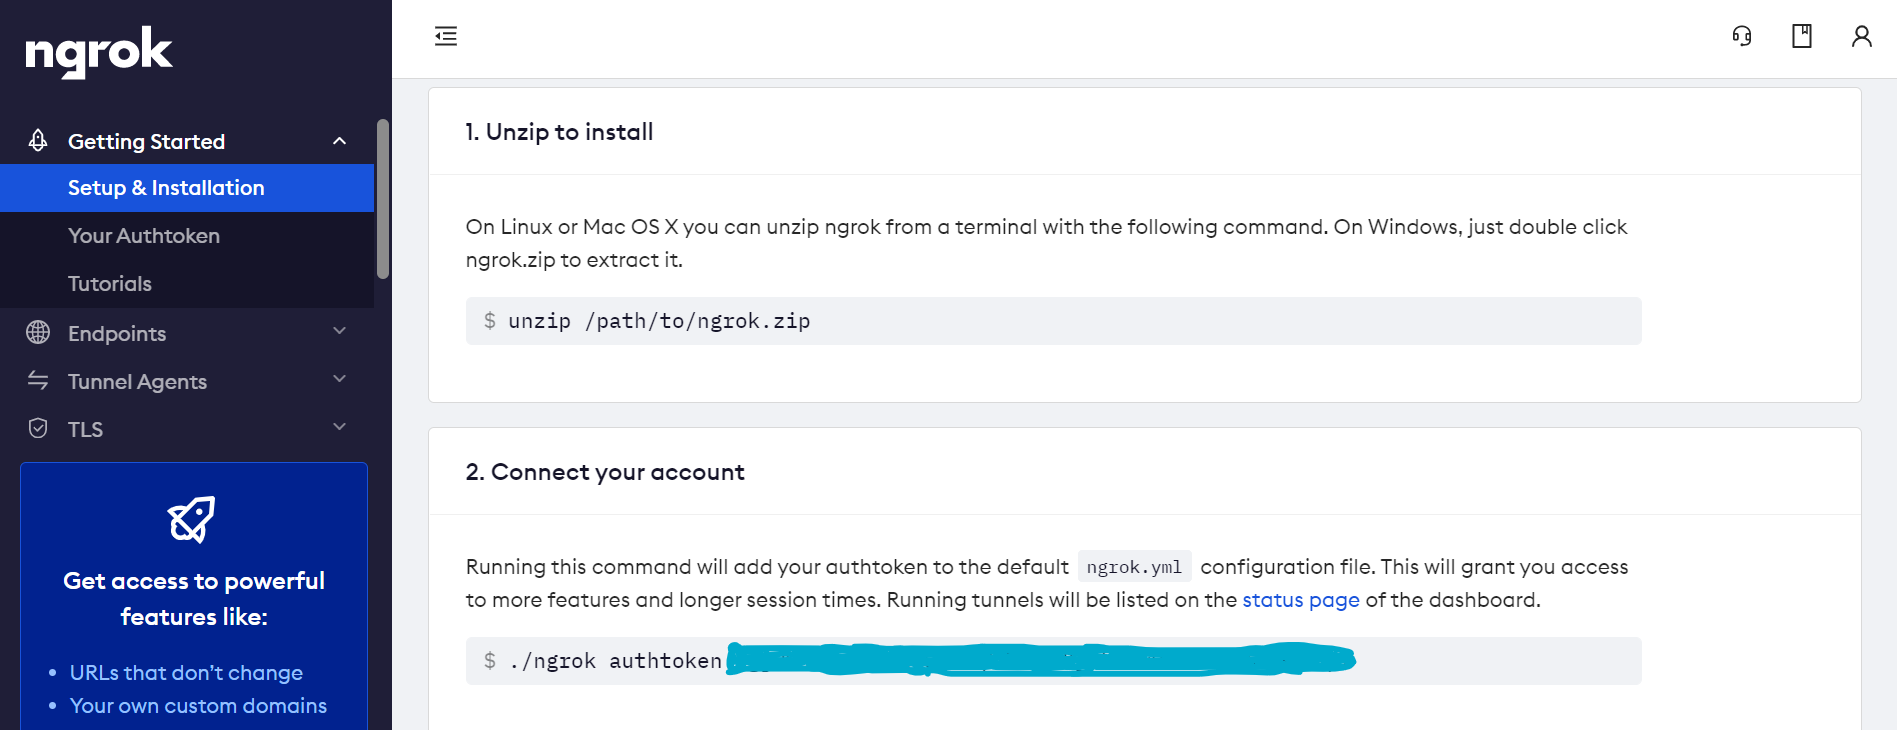

In [41]:
!ngrok authtoken ********

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [44]:
from pyngrok import ngrok

# Open a HTTP tunnel on the default port 80
public_url = ngrok.connect(port='8050')
# Open a SSH tunnel
ssh_url = ngrok.connect(22, 'tcp')

In [45]:
app.run_server(mode = 'external')
# There are two types of server modes:
# Inline : Runs inside Jupyter Notebook. (It couldn't connect to the internal server.)
# External : Generates a link where you run on another tab.

Dash app running on:


<IPython.core.display.Javascript object>

***If you get an error in the above cell, kill ngrok server first then run the cell again.***


```
ngrok.kill()
```



In [ ]:
public_url

<NgrokTunnel: "http://8b1e47fa727e.ngrok.io" -> "http://localhost:80">

In [46]:
ngrok.kill()